# Keras
Librería para programar redes neuronales de una manera más sencilla que con TensorFlow. Keras se encuentra en una capa de abstracción por encima de TensorFlow.

[Documentación](https://keras.io/guides/)

In [1]:
# !pip install tensorflow
# !pip install keras

In [1]:
%pip install tensorflow

  Using cached tensorflow-2.20.0-cp313-cp313-win_amd64.whl.metadata (4.6 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached grpcio-1.76.0-cp313-cp313-win_amd64.whl.metadata (3.8 kB)
  Using cached tensorboard-2.20.0-py3-none-any.whl.metadata (1.8 kB)
  Using cached markdown-3.10-py3-none-any.whl.metadata (5.1 kB)
Using cached tensorflow-2.20.0-cp313-cp313-win_amd64.whl (332.0 MB)
Using cached grpcio-1.76.0-cp313-cp313-win_amd64.whl (4.7 MB)
Using cached tensorboard-2.20.0-py3-none-any.whl (5.5 MB)
Using cached astunparse-1.6.3-py2.py3-none-any.whl (12 kB)
Using cached gast-0.6.0-py3-none-any.whl (21 kB)
Using cached google_pasta-0.2.0-py3-none-any.whl (57 kB)
Using cached markdown-3.10-py3-none-any.whl (107 kB)

   ---------------------------------------- 0/7 [markdown]
   ---------------------------------------- 0/7

In [4]:
%pip install --upgrade pip

   ---------------------------------------- 0.0/1.8 MB ? eta -:--:--
   ---------------------------------------- 1.8/1.8 MB 34.8 MB/s  0:00:00
  Attempting uninstall: pip
    Found existing installation: pip 25.2
    Uninstalling pip-25.2:
      Successfully uninstalled pip-25.2
Note: you may need to restart the kernel to use updated packages.


In [7]:
%pip install keras --upgrade

  Using cached keras-3.12.0-py3-none-any.whl.metadata (5.9 kB)
Using cached keras-3.12.0-py3-none-any.whl (1.5 MB)
  Attempting uninstall: keras
    Found existing installation: keras 3.9.2
    Uninstalling keras-3.9.2:
      Successfully uninstalled keras-3.9.2
Note: you may need to restart the kernel to use updated packages.


In [73]:
%pip install "protobuf>=5.28.3,<6"

  Using cached protobuf-5.29.5-cp310-abi3-win_amd64.whl.metadata (592 bytes)
Using cached protobuf-5.29.5-cp310-abi3-win_amd64.whl (434 kB)
  Attempting uninstall: protobuf
    Found existing installation: protobuf 6.31.1
    Uninstalling protobuf-6.31.1:
      Successfully uninstalled protobuf-6.31.1
Note: you may need to restart the kernel to use updated packages.


  You can safely remove it manually.


In [ ]:
# en la siguiente versión dicen que no hará falta usar protobuf menor de la versión 6

Empezamos importando librerías

In [43]:
# import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
import numpy as np

Cargamos los datos de mnist. No vamos a tratar imagenes con redes convolucionales (perdemos la estructura espacial 2D). Todos los pixeles se convertirán en un vector de 28x28 features independientes, que serán las entradas del modelo.

In [44]:
# Cogemos las imágenes de los dígitos asi como el conjunto de train y test
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

Vemos dimensiones del dataset

In [45]:
'''
60.000 imagenes de 28x28 pixeles
'''
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [46]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [47]:
2**8

256

60.000 imágenes de 28x28 pixeles. Vamos a representar una de ellas

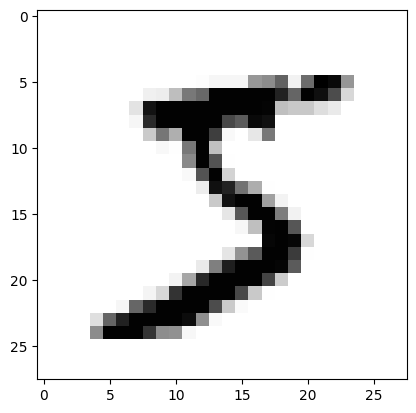

In [48]:
import matplotlib.pyplot as plt

plt.imshow(X_train[0], cmap=plt.get_cmap('Greys'));

Cada imagen se compone de 28x28 pixeles, y cada pixel representa una escala de grises que va del 0 al 255. Siendo 0 el blanco y 255 negro.

¿Se te ocurre alguna manera de normalizar los datos?

In [49]:
np.max(X_train)

np.uint8(255)

In [50]:
0/255

0.0

In [51]:
128/255

0.5019607843137255

In [52]:
255/255

1.0

In [53]:
X_train = X_train.astype("float32")/255
X_test = X_test.astype("float32")/255

In [54]:
np.mean(X_train)

np.float32(0.13066047)

In [55]:
'''
Comprobamos la normalización
'''
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [56]:
y_train = y_train.astype("float32")
y_test = y_test.astype("float32")

Guardamos datos para validación. Estos datos se usarán durante el entrenamiento. Otra opción es decirle a keras en la etapa de entrenamiento que reserve un X % de los datos para validar.

In [57]:
X_val = X_train[-10000:]
y_val = y_train[-10000:]

X_train = X_train[:-10000]
y_train = y_train[:-10000]

In [58]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(50000, 28, 28)
(10000, 28, 28)
(10000, 28, 28)


Montamos la arquitectura de la red neuronal. Se va a componer de:
* **Sequential**: API para iniciar la red neuronal. No cuenta como capa.
* **Flatten**: capa de entrada. Necesita un vector unidimensional. Como tenemos imágenes, esta capa aplana las imagenes (2D) en 1D.
* **Dense**: es una hidden layer. Se compondrá de `n` neuronas y de una función de activación que se aplicará a todas las neuronas de la capa.

Recuerda que es un problema de clasificación multiclase (10 clases) y que por tanto la última capa se compondrá de tantas neuronas como clases tengas.

En cuanto a las funciones de activación es recomendable usar relu en las hidden layer, que tarda menos en entrenar, mientras que la ultima (output) suele ser una softmax.

In [59]:
28*28

784

In [60]:
X_train.shape

(50000, 28, 28)

In [61]:
28*28

784

In [62]:
model = keras.models.Sequential()

# Capa entrada
#model.add(keras.layers.Flatten(input_shape=(28, 28)))

model.add(keras.layers.Input(shape=((28, 28))))


# Hidden layer
model.add(keras.layers.Dense(units = 300,
                            activation='relu'))

# Hidden layer
model.add(keras.layers.Dense(units = 100,
                            activation='relu'))

# Capa salida
model.add(keras.layers.Dense(units = 10,
                            activation='softmax'))

In [63]:
# Otra manera de declarar la red neuronal
capas = [
    #keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Input(shape=(28, 28)),
    keras.layers.Flatten(),
    keras.layers.Dense(units = 300, activation='relu'),
    keras.layers.Dense(units = 100, activation='relu'),
    keras.layers.Dense(units = 10, activation='softmax')
]

model = keras.models.Sequential(capas)

Podemos ver las capas, y acceder a sus elementos

In [64]:
print(model.layers[0])

<Flatten name=flatten, built=True>


Podemos ver los pesos de las capas sin entrenar, porque los inicializa aleatoriamente. Los bias los inicializa a 0.

In [65]:
hidden1 = model.layers[1]
weights, biases = hidden1.get_weights()

In [66]:
weights

array([[-0.06523715,  0.06323341, -0.07353044, ...,  0.02270768,
         0.04254903, -0.04223346],
       [ 0.00750845,  0.01635586, -0.01565421, ...,  0.01935138,
        -0.01155591, -0.06909249],
       [-0.01583084,  0.04369369,  0.0243899 , ...,  0.0704425 ,
         0.00028973,  0.0379807 ],
       ...,
       [-0.00586426, -0.05841251,  0.05182852, ..., -0.00143751,
        -0.02719956,  0.02987447],
       [-0.05304849, -0.04382157, -0.05149212, ..., -0.04508246,
         0.04587834, -0.00014073],
       [ 0.04766268, -0.05680361,  0.04042324, ...,  0.01907958,
        -0.00138703,  0.04957102]], shape=(784, 300), dtype=float32)

In [67]:
len(weights)

784

In [68]:
len(weights[0])

300

In [69]:
28*28

784

In [70]:
300*784

235200

In [71]:
weights.size

235200

In [72]:
len(biases)

300

Establecemos la configuración de ejecución... el compile.

In [73]:
model.compile(
    optimizer = keras.optimizers.SGD(),
    loss = keras.losses.SparseCategoricalCrossentropy(),
    metrics = [keras.metrics.SparseCategoricalAccuracy()]
)

In [74]:
# Equivalente
model.compile(
    optimizer = "sgd",
    loss = "sparse_categorical_crossentropy",
    metrics = ["accuracy"]
)

In [75]:
# Summary
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [76]:
784 * 300 + 300

235500

In [77]:
# 1º neurona de la 1º hidden layer
# y = a + w1*x1 + w2*x2 + .... wn*xn
# a es el intercepto llamado bias
# wn es cada uno de los pesos que va a ir actualizando con el backpropagation
# n es 784
# En la 1º hidden layer tenemos 784 pesos por cada neurona, al tener 300, tenemos un total de:
print(784*300 + 300)

235500


In [78]:
300 * 784 + 300

235500

In [79]:
300 * 100 + 100

30100

In [80]:
100 * 10 + 10

1010

Entrenamos el modelo. Usamos los datos de entrenamiento. El batch_size es la cantidad de muestras que utiliza el SGD, y las epochs son las iteraciones que realiza en el entrenamiento.

In [81]:
X_train.shape

(50000, 28, 28)

In [82]:
40000/128

312.5

In [83]:
history = model.fit(
    X_train,
    y_train,
    batch_size = 128,
    epochs = 50,
    validation_data = (X_val, y_val) # validation_split = 0.1
)

Epoch 1/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6876 - loss: 1.2966 - val_accuracy: 0.8566 - val_loss: 0.6200
Epoch 2/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8631 - loss: 0.5291 - val_accuracy: 0.8913 - val_loss: 0.4063
Epoch 3/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8883 - loss: 0.4044 - val_accuracy: 0.9058 - val_loss: 0.3401
Epoch 4/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9016 - loss: 0.3517 - val_accuracy: 0.9133 - val_loss: 0.3069
Epoch 5/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9100 - loss: 0.3201 - val_accuracy: 0.9201 - val_loss: 0.2852
Epoch 6/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9156 - loss: 0.2976 - val_accuracy: 0.9244 - val_loss: 0.2676
Epoch 7/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9208 - loss: 0.2796 - val_accuracy: 0.9273 - val_loss: 0.2544
Epoch 8/50
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9248 - loss: 0.2650 - val_accuracy: 0.

Podemos reentrenar el modelo. No empieza de nuevo, sino que retoma el entrenamiento anterior.

In [84]:
model.fit(
    X_train,
    y_train,
    batch_size = 64,
    epochs = 10,
    validation_data = (X_val, y_val) # validation_split = 0.1
)

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9776 - loss: 0.0817 - val_accuracy: 0.9723 - val_loss: 0.1016
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9789 - loss: 0.0790 - val_accuracy: 0.9713 - val_loss: 0.1037
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9794 - loss: 0.0758 - val_accuracy: 0.9721 - val_loss: 0.0997
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9801 - loss: 0.0734 - val_accuracy: 0.9730 - val_loss: 0.0974
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9805 - loss: 0.0709 - val_accuracy: 0.9728 - val_loss: 0.0981
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9815 - loss: 0.0682 - val_accuracy: 0.9733 - val_loss: 0.0960
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9821 - loss: 0.0658 - val_accuracy: 0.9740 - val_loss: 0.0933
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9829 - loss: 0.0638 - val_accuracy: 0.

Veamos el histórico del entrenamiento, para poder representarlo posteriormente.

In [85]:
# print(history.params)
# print(history.epoch)
print(history.history)

{'accuracy': [0.6876000165939331, 0.8630599975585938, 0.8883200287818909, 0.9015600085258484, 0.9099599719047546, 0.9155799746513367, 0.9207599759101868, 0.924780011177063, 0.9281399846076965, 0.9315400123596191, 0.9345399737358093, 0.9373999834060669, 0.9395400285720825, 0.9416400194168091, 0.943560004234314, 0.9456800222396851, 0.9468200206756592, 0.9490000009536743, 0.9506999850273132, 0.952019989490509, 0.953279972076416, 0.9545800089836121, 0.9556199908256531, 0.9570599794387817, 0.9584199786186218, 0.9592999815940857, 0.9604399800300598, 0.9614800214767456, 0.9626799821853638, 0.9638000130653381, 0.9653199911117554, 0.9656800031661987, 0.9667199850082397, 0.9681400060653687, 0.968280017375946, 0.968999981880188, 0.970579981803894, 0.9711199998855591, 0.9715200066566467, 0.9722200036048889, 0.9729599952697754, 0.9735199809074402, 0.9739199876785278, 0.9745399951934814, 0.9753999710083008, 0.9755600094795227, 0.9763000011444092, 0.9763399958610535, 0.9769600033760071, 0.97763997316

In [86]:
history.history

{'accuracy': [0.6876000165939331,
  0.8630599975585938,
  0.8883200287818909,
  0.9015600085258484,
  0.9099599719047546,
  0.9155799746513367,
  0.9207599759101868,
  0.924780011177063,
  0.9281399846076965,
  0.9315400123596191,
  0.9345399737358093,
  0.9373999834060669,
  0.9395400285720825,
  0.9416400194168091,
  0.943560004234314,
  0.9456800222396851,
  0.9468200206756592,
  0.9490000009536743,
  0.9506999850273132,
  0.952019989490509,
  0.953279972076416,
  0.9545800089836121,
  0.9556199908256531,
  0.9570599794387817,
  0.9584199786186218,
  0.9592999815940857,
  0.9604399800300598,
  0.9614800214767456,
  0.9626799821853638,
  0.9638000130653381,
  0.9653199911117554,
  0.9656800031661987,
  0.9667199850082397,
  0.9681400060653687,
  0.968280017375946,
  0.968999981880188,
  0.970579981803894,
  0.9711199998855591,
  0.9715200066566467,
  0.9722200036048889,
  0.9729599952697754,
  0.9735199809074402,
  0.9739199876785278,
  0.9745399951934814,
  0.9753999710083008,
  0.9

In [87]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [88]:
pd.DataFrame(history.history)

,accuracy,loss,val_accuracy,val_loss
0,0.68760,1.296636,0.8566,0.620043
1,0.86306,0.529087,0.8913,0.406258
2,0.88832,0.404426,0.9058,0.340102
3,0.90156,0.351653,0.9133,0.306886
4,0.90996,0.320135,0.9201,0.285206
5,0.91558,0.297596,0.9244,0.267609
6,0.92076,0.279617,0.9273,0.254373
7,0.92478,0.264992,0.9316,0.243366
8,0.92814,0.252202,0.9354,0.231149
9,0.93154,0.240813,0.9383,0.223587


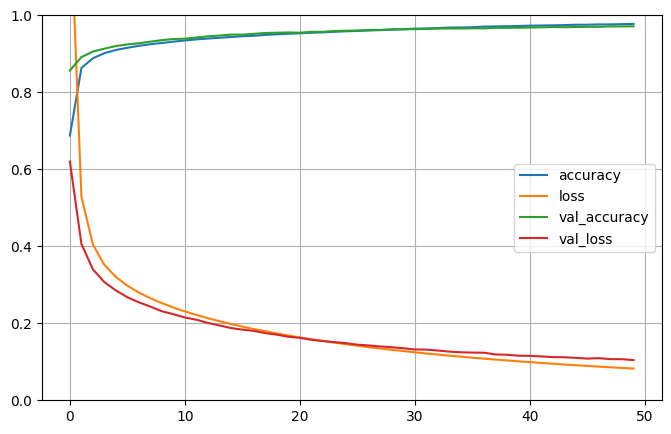

In [89]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

Si el modelo no ha ido bien, prueba a cambiar el learning rate, cambia de optimizador y después prueba a cambiar capas, neuronas y funciones de activación.

Ya tenemos el modelo entrenado. Probémoslo con test

In [90]:
results = model.evaluate(X_test, y_test)
results

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9722 - loss: 0.0900


[0.09002555161714554, 0.9721999764442444]

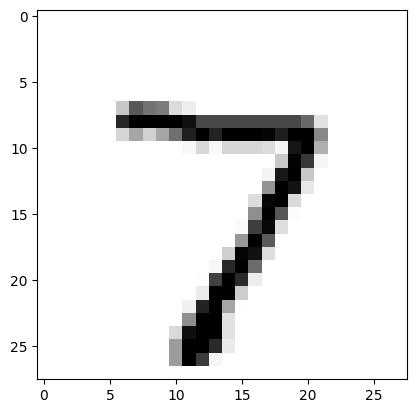

In [91]:
# Cogemos el primero
plt.imshow(X_test[0].reshape(28,28), cmap=plt.get_cmap('Greys'));

In [92]:
X_test[:1]

array([[[0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.        , 0.        , 0.        , 0.        , 0.        ,
         0.

In [93]:
predictions = model.predict(X_test[:1])
print(predictions.shape)
np.round(predictions,3)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
(1, 10)


array([[0.   , 0.   , 0.   , 0.001, 0.   , 0.   , 0.   , 0.999, 0.   ,
        0.   ]], dtype=float32)

In [94]:
predictions.argmax()

np.int64(7)

In [95]:
X_test.shape[0]

10000

In [96]:
X_test.shape[0]/32

312.5

In [97]:
model.predict(X_test).argmax(axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  


array([7, 2, 1, ..., 4, 5, 6], shape=(10000,))

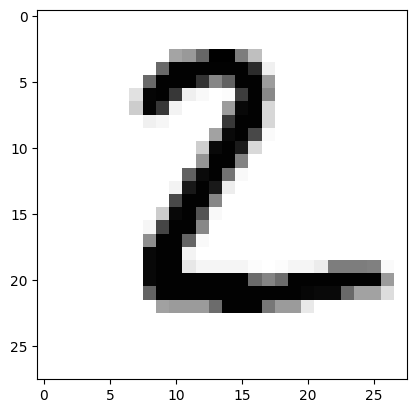

In [98]:
plt.imshow(X_test[1].reshape(28,28), cmap=plt.get_cmap('Greys'));

In [99]:
from sklearn.metrics import confusion_matrix, classification_report

confusion_matrix(y_test, model.predict(X_test).argmax(axis=1))

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[ 969,    0,    0,    1,    1,    2,    3,    1,    2,    1],
       [   0, 1121,    3,    1,    0,    2,    4,    0,    4,    0],
       [   5,    2, 1010,    2,    1,    0,    2,    5,    5,    0],
       [   0,    1,    5,  983,    0,    5,    1,    6,    6,    3],
       [   1,    0,    5,    1,  958,    0,    2,    2,    1,   12],
       [   6,    1,    0,   10,    3,  851,   10,    1,    6,    4],
       [   4,    3,    1,    0,    8,    5,  933,    0,    4,    0],
       [   2,   11,   12,    4,    0,    0,    0,  991,    1,    7],
       [   5,    0,    1,    8,    3,    4,    7,    4,  939,    3],
       [   4,    5,    3,    7,   13,    2,    2,    5,    1,  967]])

In [100]:
print(classification_report(y_test, model.predict(X_test).argmax(axis=1)))

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
              precision    recall  f1-score   support

         0.0       0.97      0.99      0.98       980
         1.0       0.98      0.99      0.98      1135
         2.0       0.97      0.98      0.97      1032
         3.0       0.97      0.97      0.97      1010
         4.0       0.97      0.98      0.97       982
         5.0       0.98      0.95      0.97       892
         6.0       0.97      0.97      0.97       958
         7.0       0.98      0.96      0.97      1028
         8.0       0.97      0.96      0.97       974
         9.0       0.97      0.96      0.96      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



### Problema de regresión
Veamos un ejemplo de cómo aplicar una red neuronal de TensorFlow a un problema de regresión.

In [116]:
# Cargamos datos
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()
df = pd.DataFrame(housing.data, columns = housing.feature_names)
df['target'] = housing['target']
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


Divimos en train, test y validation

In [117]:
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data,
                                                              housing.target)

X_train, X_valid, y_train, y_valid = train_test_split(X_train_full,
                                                      y_train_full)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [118]:
X_train.shape

(11610, 8)

Montamos el modelo. Simplemente se compondrá de una hidden layer, a la que le configuramos una capa previa de entrada de 8 neuronas (las features).

Se trata de un modelo de regresión, por lo que la capa de salida es una única neurona.

In [119]:
11610/32

362.8125

In [120]:
X_train.shape[1:]

(8,)

In [121]:
model = keras.models.Sequential([
    keras.layers.Input(shape=X_train.shape[1:]),
    keras.layers.Dense(30, activation = 'relu'),
                      #input_shape = X_train.shape[1:]),
    keras.layers.Dense(1)
])

model.compile(loss = "mean_squared_error",
             optimizer = "sgd")

history = model.fit(X_train,
                   y_train,
                   epochs = 20,
                   validation_data = (X_valid, y_valid))

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 3.4252 - val_loss: 0.7452
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.5927 - val_loss: 0.4525
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.4451 - val_loss: 0.3873
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.4212 - val_loss: 0.3776
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.4002 - val_loss: 0.3591
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3898 - val_loss: 0.3578
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3851 - val_loss: 0.3501
Epoch 8/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3826 - val_loss: 0.3445
Epoch 9/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3801 - val_loss: 0.3494
Epoch 10/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3768 - val_loss: 0.3451
Epoch 11/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3741 - val_loss: 0.3434
Epoch 12/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

In [122]:
8*30 + 30

270

In [123]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                │ (None, 30)             │           270 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │            31 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 303 (1.19 KB)

 Trainable params: 301 (1.18 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

In [124]:
mse_test = model.evaluate(X_test, y_test)
print(mse_test)

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3724  
0.3723529577255249


In [125]:
y_pred = model.predict(X_test[:5])
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


array([[3.7556653],
       [3.2168756],
       [2.2540374],
       [1.045425 ],
       [1.5827267]], dtype=float32)

### Guardar modelo
Para guardar el modelo, en el formato de Keras. 

In [129]:
model.save("my_keras_model.keras")

In [130]:
# Lo volvemos a cargar
model = keras.models.load_model("my_keras_model.keras")

### Callbacks
Son funciones predefinidas de Keras a aplicar durante el entrenamiento
Por ejemplo, `ModelCheckpoint` sirve para que el modelo se vaya guardando tras cada epoch. Así no perdemos el progreso en caso de que decidamos interrumpir el entrenamiento. El callback recibe como argumento el nombre del objeto donde queremos que se guarde el modelo entrenado.

In [131]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("callback_model.keras")
history = model.fit(X_train,
                   y_train,
                   epochs=30,
                   callbacks = [checkpoint_cb])

Epoch 1/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3822
Epoch 2/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3676  
Epoch 3/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3583  
Epoch 4/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3562  
Epoch 5/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4291  
Epoch 6/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3589 
Epoch 7/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.3561
Epoch 8/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3539  
Epoch 9/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3546
Epoch 10/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3505
Epoch 11/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3488
Epoch 12/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3479
Epoch 13/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3472
Epoch 14/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3460
Epoch 15/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 1m

### Early Stopping
Interrumpe el entrenamiento cuando no ve progreso en el set de validación. Para ello tiene en cuenta un numero de epochs llamado `patience`. Se puede combinar con el callback

In [132]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3)
history = model.fit(X_train,
                   y_train,
                   epochs=50,
                   validation_data = (X_valid, y_valid),
                   callbacks = [early_stopping_cb, checkpoint_cb])

Epoch 1/50
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3389 - val_loss: 0.3065
Epoch 2/50
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3325 - val_loss: 0.3078
Epoch 3/50
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3310 - val_loss: 0.3014
Epoch 4/50
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3278 - val_loss: 0.3029
Epoch 5/50
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3295 - val_loss: 0.3081
Epoch 6/50
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.3275 - val_loss: 0.3168
